In [163]:
import pandas as pd
import numpy as n
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [164]:
##Load Dataset

In [166]:
from google.colab import files
uploaded = files.upload()

Saving SuperMarket Analysis.csv to SuperMarket Analysis (1).csv


In [167]:
df = pd.read_csv("/content/SuperMarket Analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [168]:
## checking for details about the dataset, for missing values, duplicates

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [170]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [171]:
df.shape

(1000, 17)

In [172]:
df.duplicated().sum()

np.int64(0)

In [173]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [23]:
## Preprocessing of the dataset,
##One-Hot Encode Categorical Variables & Separate Target

In [160]:
drop_cols = ['Invoice ID', 'cogs', 'gross margin percentage',
             'gross income', 'Tax 5%', 'Rating', 'Date', 'Time']

In [175]:
df.columns = df.columns.str.strip()


In [178]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [179]:
y = df['Sales']

In [180]:
drop_cols = ['Invoice ID', 'cogs', 'gross margin percentage',
             'gross income', 'Tax 5%', 'Rating', 'Date', 'Time']

X = df.drop(columns=drop_cols + ['Sales'])

In [181]:
## Features encoding

In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))


In [183]:
## Scale features

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [185]:
## Train/test split

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [187]:
##Train models

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [189]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [206]:
# Random Forest
#rf = RandomForestRegressor(random_state=42)
#rf.fit(X_train, y_train)
#y_pred_rf = rf.predict(X_test)
from sklearn.ensemble import RandomForestRegressor

# Limit max depth to prevent overfitting
rf = RandomForestRegressor(
    n_estimators=100,   # number of trees
    max_depth=10,       # maximum depth of each tree
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

In [207]:
##Evaluate models

In [208]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression R²: 0.9023902823554019
Linear Regression MAE: 59.196801199262964


In [209]:

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

Random Forest R²: 0.9989317466447893
Random Forest MAE: 5.517737315387503


In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
##  Actual vs Predicted (Linear Regression)

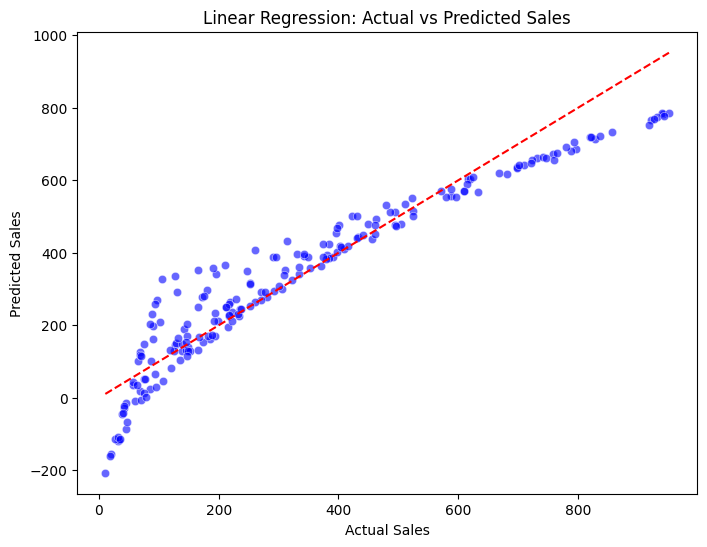

In [203]:
# Linear Regression: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.show()

In [198]:
## Actual vs Predicted (Random Forest)


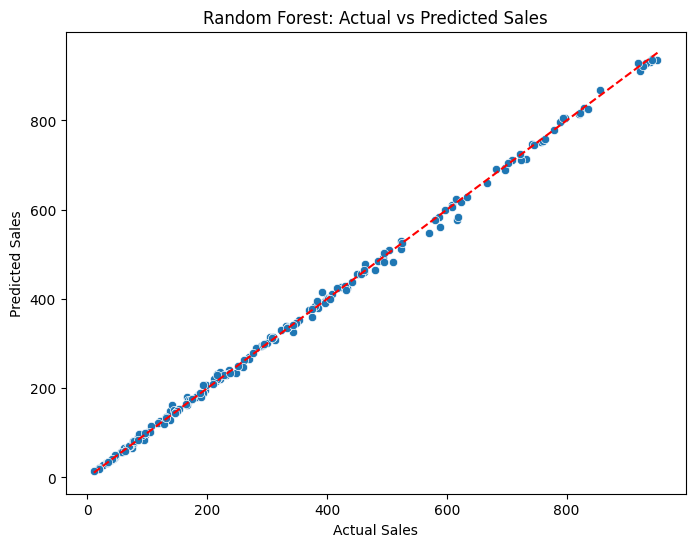

In [204]:
# Random Forest: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [200]:
##Feature Importance (Random Forest)

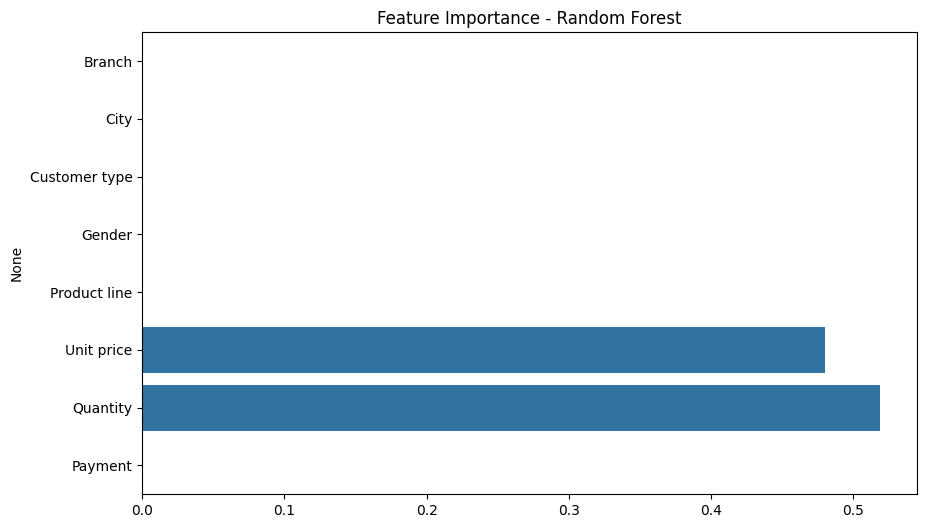

In [201]:
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

In [211]:
## cross-validation(to check for true overfitting)

In [210]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')
print("Random Forest 5-fold CV R²:", scores)
print("Mean R²:", scores.mean())

Random Forest 5-fold CV R²: [0.99872032 0.99878765 0.99879255 0.99876177 0.99883786]
Mean R²: 0.9987800294820005


In [214]:
## Pairplot (if dataset is small)

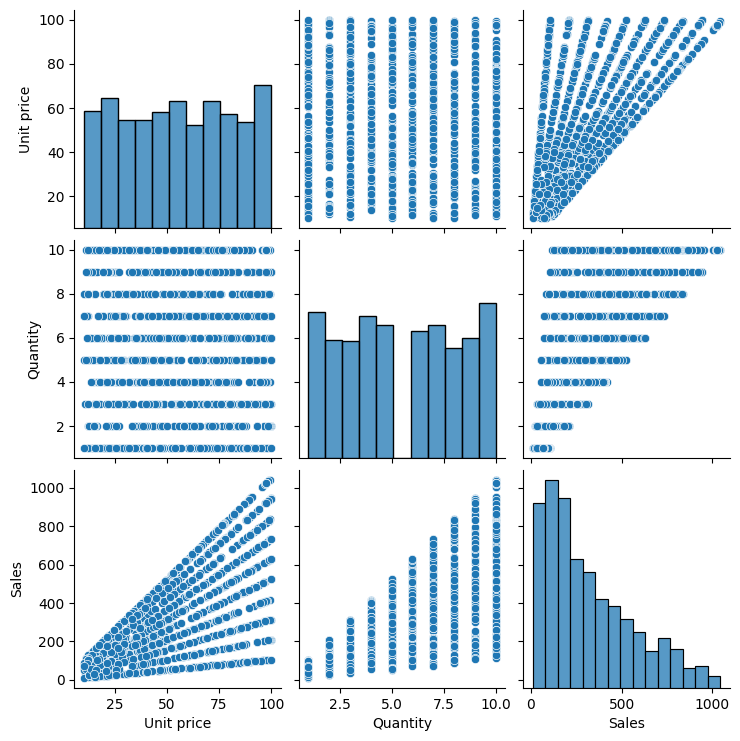

In [213]:
sns.pairplot(df[['Unit price','Quantity','Sales']])
plt.show()

In [215]:
## Correlation Heatmap(Shows relationships between features and Sales)

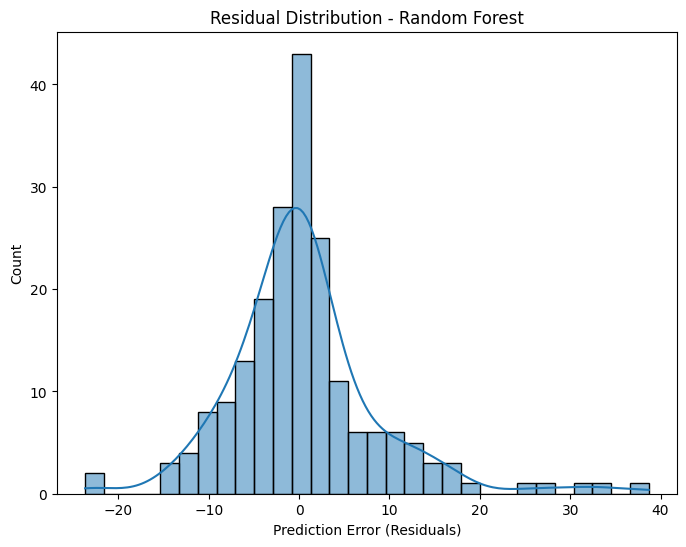

In [226]:
##Distribution of Errors
residuals = y_test - y_pred_rf
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Prediction Error (Residuals)")
plt.title("Residual Distribution - Random Forest")
plt.show()

In [227]:
numeric_cols = ['Unit price', 'Quantity', 'Sales']  # numeric features + target
df_numeric = df[numeric_cols]

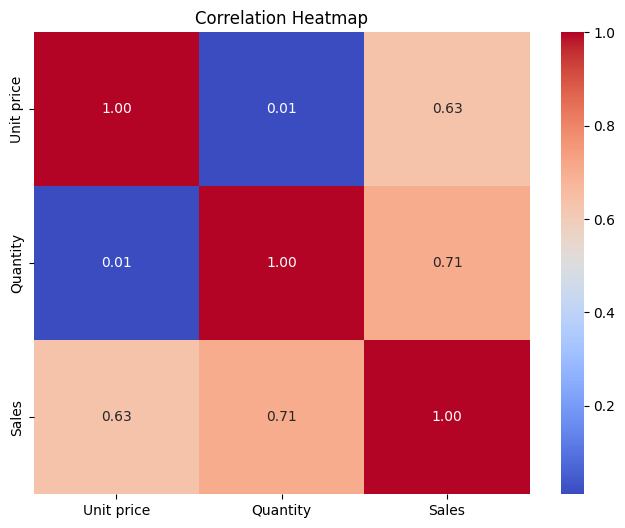

In [228]:
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [229]:
df.to_csv('SuperMarket_Sales_cleaned.csv', index=False)